In [38]:
!pip install mplfinance

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller,acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [40]:
df = pd.read_csv('/kaggle/input/stock-market-dataset/symbols_valid_meta.csv')
df.head()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [41]:
d = df[(df['Nasdaq Traded'].astype('str')=='Y') & (df['Symbol'].astype('str').str.startswith('NV'))]

In [42]:
d[d['Symbol']=='NVDA']

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
5160,Y,NVDA,NVIDIA Corporation - Common Stock,Q,Q,N,100.0,N,N,NaN,NVDA,N


In [43]:
df2 = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/NVDA.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.533965,6109200.0
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.529172,5688000.0


In [44]:
df2.set_index('Date',drop=False, inplace=True)
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-03-26,2020-03-26,253.940002,262.220001,250.000000,257.239990,257.239990,17402700.0
2020-03-27,2020-03-27,250.000000,263.119995,248.679993,252.729996,252.729996,15970700.0
2020-03-30,2020-03-30,255.360001,265.959991,253.589996,265.589996,265.589996,15056300.0
2020-03-31,2020-03-31,267.200012,275.399994,257.750000,263.600006,263.600006,23749000.0
2020-04-01,2020-04-01,255.649994,261.529999,241.279999,243.070007,243.070007,16386900.0


In [45]:
df1 = df2.loc['2015-01-02':]
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-03-26,2020-03-26,253.940002,262.220001,250.000000,257.239990,257.239990,17402700.0
2020-03-27,2020-03-27,250.000000,263.119995,248.679993,252.729996,252.729996,15970700.0
2020-03-30,2020-03-30,255.360001,265.959991,253.589996,265.589996,265.589996,15056300.0
2020-03-31,2020-03-31,267.200012,275.399994,257.750000,263.600006,263.600006,23749000.0
2020-04-01,2020-04-01,255.649994,261.529999,241.279999,243.070007,243.070007,16386900.0


In [46]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-01-02,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.395155,2842000.0
2015-01-05,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.067572,4948800.0
2015-01-06,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.489475,4944100.0
2015-01-07,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.441298,8045200.0
2015-01-08,2015-01-08,19.360001,19.980000,19.350000,19.860001,19.135012,7094500.0


In [47]:
df1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
df1[columns] = df1[columns].fillna(df1[columns].ffill())

/tmp/ipykernel_2133/4008006996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns] = df1[columns].fillna(df1[columns].ffill())


In [49]:
df1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [50]:
df1 = df1.drop_duplicates(inplace=False)

In [51]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-01-02,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.395155,2842000.0
2015-01-05,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.067572,4948800.0
2015-01-06,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.489475,4944100.0
2015-01-07,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.441298,8045200.0
2015-01-08,2015-01-08,19.360001,19.980000,19.350000,19.860001,19.135012,7094500.0


In [52]:
df1['year'] = pd.to_datetime(df1['Date']).dt.year
df1.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,,
2015-01-02,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.395155,2842000.0,2015
2015-01-05,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.067572,4948800.0,2015
2015-01-06,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.489475,4944100.0,2015


In [53]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

skewness_values = df1[columns].skew()

def classify_skewness(skewness):
    if -0.5 <= skewness <= 0.5:
        return "symmetrical"
    elif skewness < -0.5:
        return "left-skewed"
    elif skewness > 0.5:
        return "right-skewed"
    else:
        return "undefined"

for column, skewness in skewness_values.items():
    skew_type = classify_skewness(skewness)
    print(f"Skewness for '{column}' column: {skewness:.4f} ({skew_type})")

Skewness for 'Open' column: 0.0407 (symmetrical)
Skewness for 'High' column: 0.0397 (symmetrical)
Skewness for 'Low' column: 0.0452 (symmetrical)
Skewness for 'Close' column: 0.0428 (symmetrical)
Skewness for 'Adj Close' column: 0.0428 (symmetrical)


In [54]:
df1[columns] = np.log(df1[columns])
skewness_values = df1[columns].skew()
for column, skewness in skewness_values.items():
    skew_type = classify_skewness(skewness)
    print(f"Skewness for '{column}' column: {skewness:.4f} ({skew_type})")

Skewness for 'Open' column: -0.5886 (left-skewed)
Skewness for 'High' column: -0.5891 (left-skewed)
Skewness for 'Low' column: -0.5879 (left-skewed)
Skewness for 'Close' column: -0.5893 (left-skewed)
Skewness for 'Adj Close' column: -0.5941 (left-skewed)


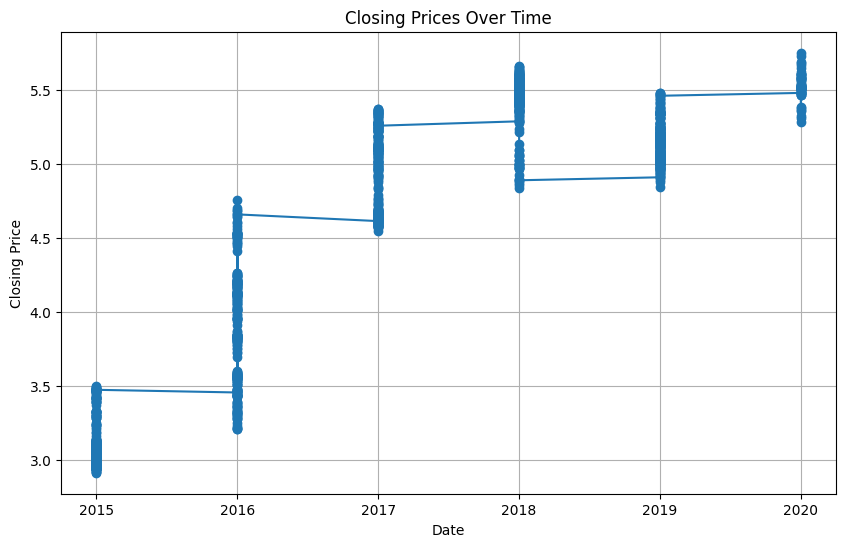

In [55]:
# Closing Prices over time
plt.figure(figsize=(10, 6))
plt.plot(df1['year'], df1['Adj Close'], marker='o')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

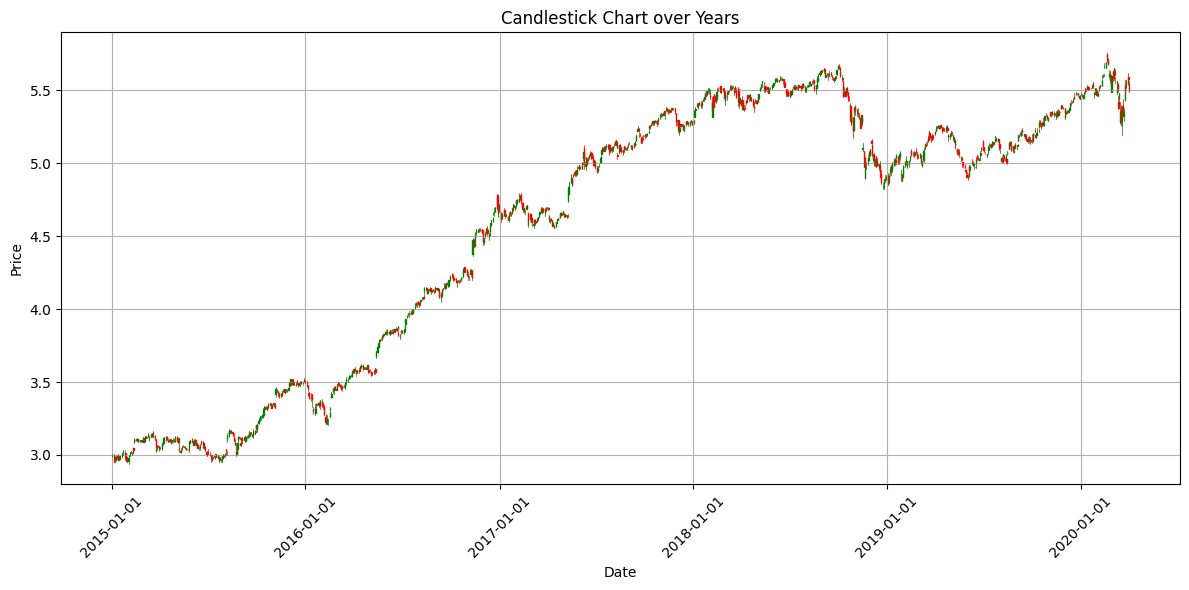

In [56]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date_num'] = mdates.date2num(df1['Date'])

ohlc_data = df1[['Date_num', 'Open', 'High', 'Low', 'Close']].copy()

fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc_data.values, width=0.6, colorup='g', colordown='r')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Candlestick Chart over Years')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [57]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,Date_num
Date,,,,,,,,,
2015-01-02,2015-01-02,3.002211,3.009635,2.986187,3.002211,2.965023,2842000.0,2015,16437.0
2015-01-05,2015-01-05,3.002211,3.005187,2.980619,2.985177,2.947989,4948800.0,2015,16440.0
2015-01-06,2015-01-06,2.986692,2.987700,2.953347,2.954389,2.917202,4944100.0,2015,16441.0
2015-01-07,2015-01-07,2.961658,2.970414,2.948641,2.951780,2.914593,8045200.0,2015,16442.0
2015-01-08,2015-01-08,2.963209,2.994732,2.962692,2.988708,2.951520,7094500.0,2015,16443.0


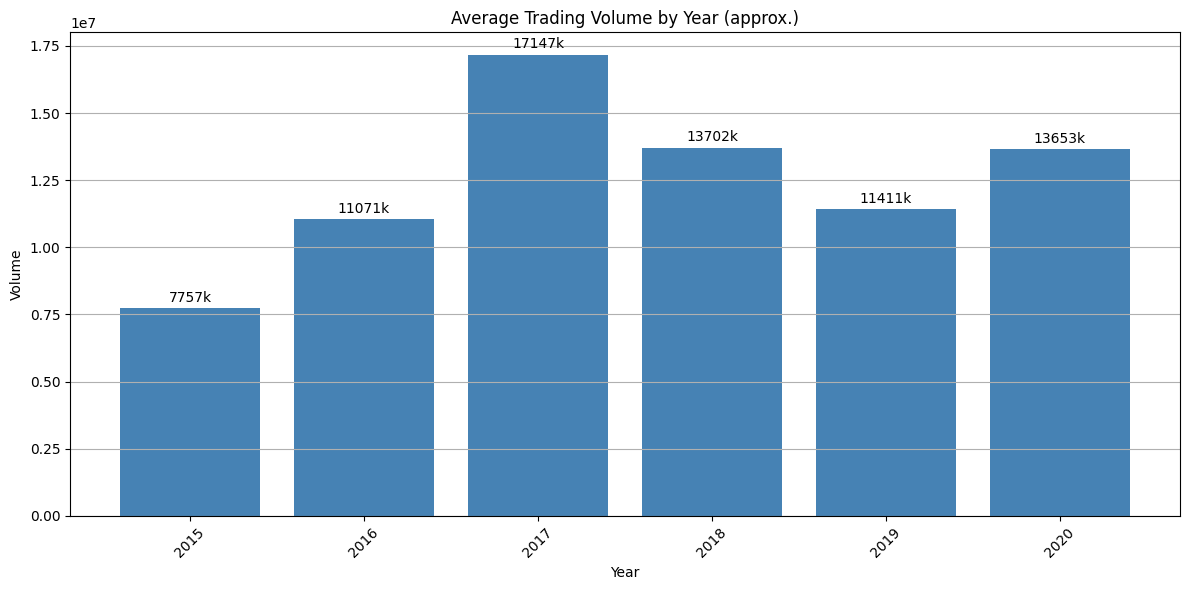

In [58]:
average_volume_by_year = df1.groupby('year')['Volume'].mean().reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(average_volume_by_year['year'], average_volume_by_year['Volume'], color='steelblue')

def format_number(x):
    return f'{x/1e3:.0f}k'

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01,
             format_number(yval),  # Format the volume value
             ha='center', va='bottom', fontsize=10, rotation=0)

plt.title('Average Trading Volume by Year (approx.)')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.grid(True, axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [59]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,Date_num
Date,,,,,,,,,
2015-01-02,2015-01-02,3.002211,3.009635,2.986187,3.002211,2.965023,2842000.0,2015,16437.0
2015-01-05,2015-01-05,3.002211,3.005187,2.980619,2.985177,2.947989,4948800.0,2015,16440.0
2015-01-06,2015-01-06,2.986692,2.987700,2.953347,2.954389,2.917202,4944100.0,2015,16441.0
2015-01-07,2015-01-07,2.961658,2.970414,2.948641,2.951780,2.914593,8045200.0,2015,16442.0
2015-01-08,2015-01-08,2.963209,2.994732,2.962692,2.988708,2.951520,7094500.0,2015,16443.0


In [60]:
print(df1.shape)
print(type(df1['Close']))
print(df1['Close'].shape if hasattr(df1['Close'], 'shape') else "Not a DataFrame or ndarray")

(1321, 9)
<class 'pandas.core.series.Series'>
(1321,)


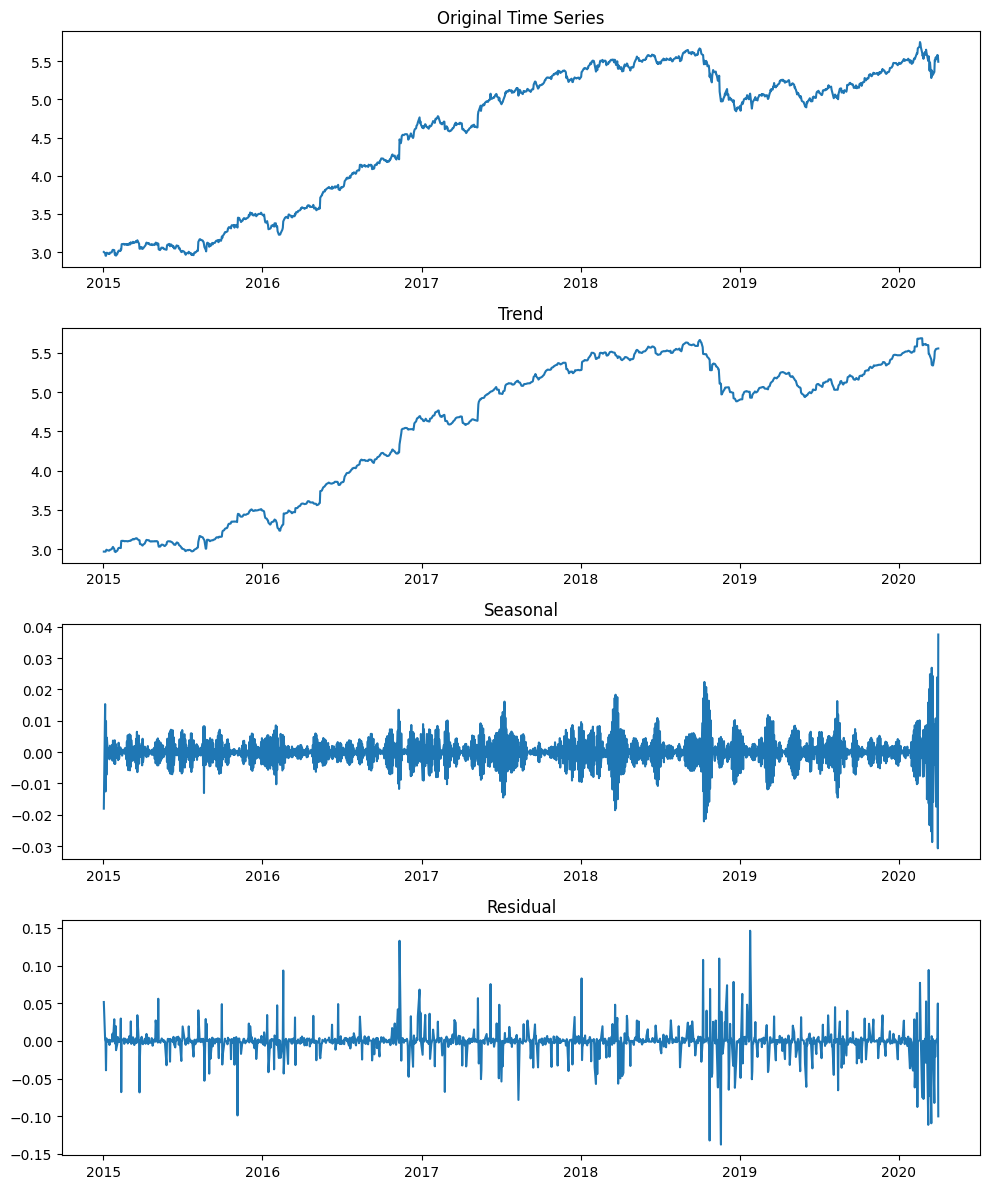


Component Statistics:

Trend:
Mean: 4.571773
Std Dev: 0.898632
Min: 2.962222
Max: 5.685786

Seasonal:
Mean: 0.000008
Std Dev: 0.005683
Min: -0.030678
Max: 0.037505

Resid:
Mean: -0.000887
Std Dev: 0.019619
Min: -0.137636
Max: 0.146105


In [61]:
df1.set_index('Date', inplace=True)
df1.sort_index(inplace=True)

def estimate_period(series):
    n = len(series)
    autocorr = [series.autocorr(lag=i) for i in range(1, min(n//2, 366))]  # Cap at 366 for efficiency
    autocorr = pd.Series(autocorr)
    peaks = autocorr[(autocorr.shift(1) < autocorr) & (autocorr.shift(-1) < autocorr)]
    if len(peaks) > 0:
        return peaks.index[0] + 1
    else:
        return 2
estimated_period = estimate_period(df1['Close'])
#print(f"Estimated period: {estimated_period}")

estimated_period = max(estimated_period, 2)

stl = STL(df1['Close'], period=estimated_period, robust=True)
result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

ax1.plot(df1.index, df1['Close'])
ax1.set_title('Original Time Series')

ax2.plot(df1.index, result.trend)
ax2.set_title('Trend')

ax3.plot(df1.index, result.seasonal)
ax3.set_title('Seasonal')

ax4.plot(df1.index, result.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

print("\nComponent Statistics:")
for component in ['trend', 'seasonal', 'resid']:
    data = getattr(result, component)
    print(f"\n{component.capitalize()}:")
    print(f"Mean: {data.mean():.6f}")
    print(f"Std Dev: {data.std():.6f}")
    print(f"Min: {data.min():.6f}")
    print(f"Max: {data.max():.6f}")

In [62]:
summary_stats = pd.concat([result.trend.describe(), result.seasonal.describe(), result.resid.describe()], axis=1)
summary_stats.columns = ['Trend', 'Seasonal', 'Residual']
print(summary_stats)

             Trend     Seasonal     Residual
count  1321.000000  1321.000000  1321.000000
mean      4.571773     0.000008    -0.000887
std       0.898632     0.005683     0.019619
min       2.962222    -0.030678    -0.137636
25%       3.586576    -0.003244    -0.002804
50%       4.997080    -0.000007    -0.000015
75%       5.332852     0.003222     0.002613
max       5.685786     0.037505     0.146105


In [63]:
window_size = 10
moving_average = df1['Close'].rolling(window=window_size, center=True).mean()
df1['Close_diff'] = df1['Close'] - moving_average

Text(0.5, 1.0, 'Detrended Data (Moving Average Method)')

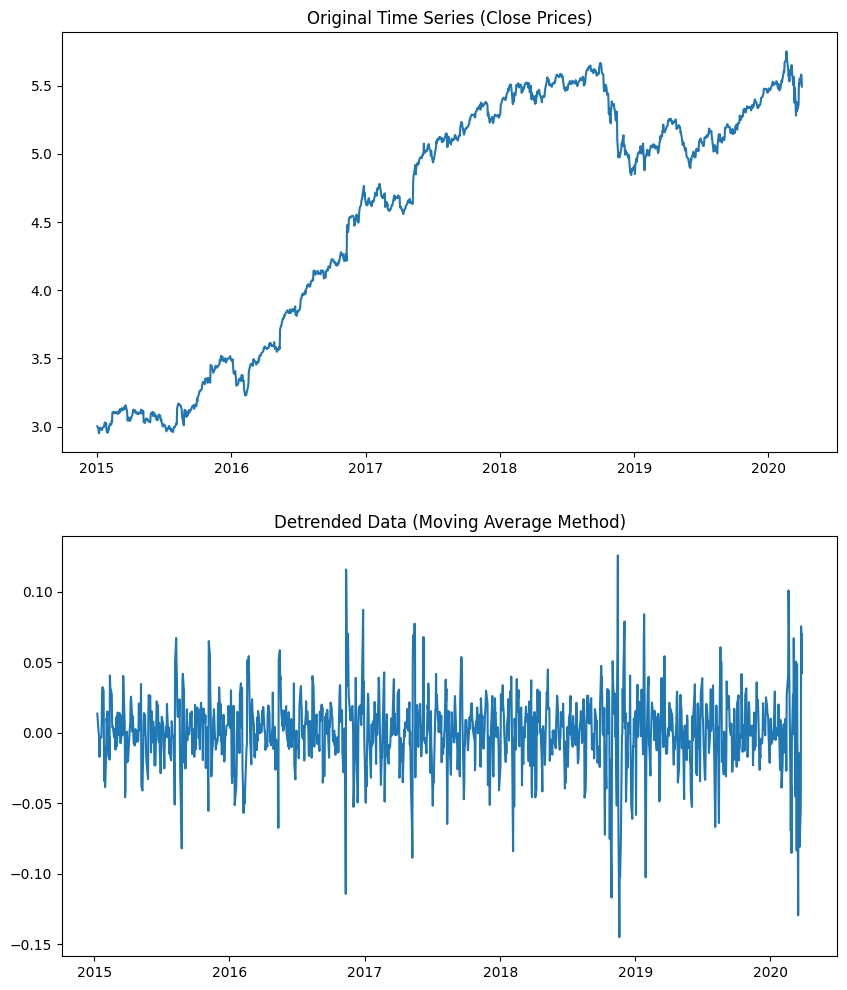

In [64]:
stl = STL(df1['Close'], period=estimated_period, robust=True)
result = stl.fit()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

ax1.plot(df1.index, df1['Close'])
ax1.set_title('Original Time Series (Close Prices)')

ax2.plot(df1.index, df1['Close_diff'])
ax2.set_title('Detrended Data (Moving Average Method)')

In [65]:
result = adfuller(df1['Close_diff'].dropna())
print('\nAugmented Dickey-Fuller Test on Close_diff Column:')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The time series Close is stationary")
else:
    print("The time series Close is non-stationary")



Augmented Dickey-Fuller Test on Close_diff Column:
ADF Statistic: -14.306306521620886
p-value: 1.205163551983283e-26
The time series Close is stationary


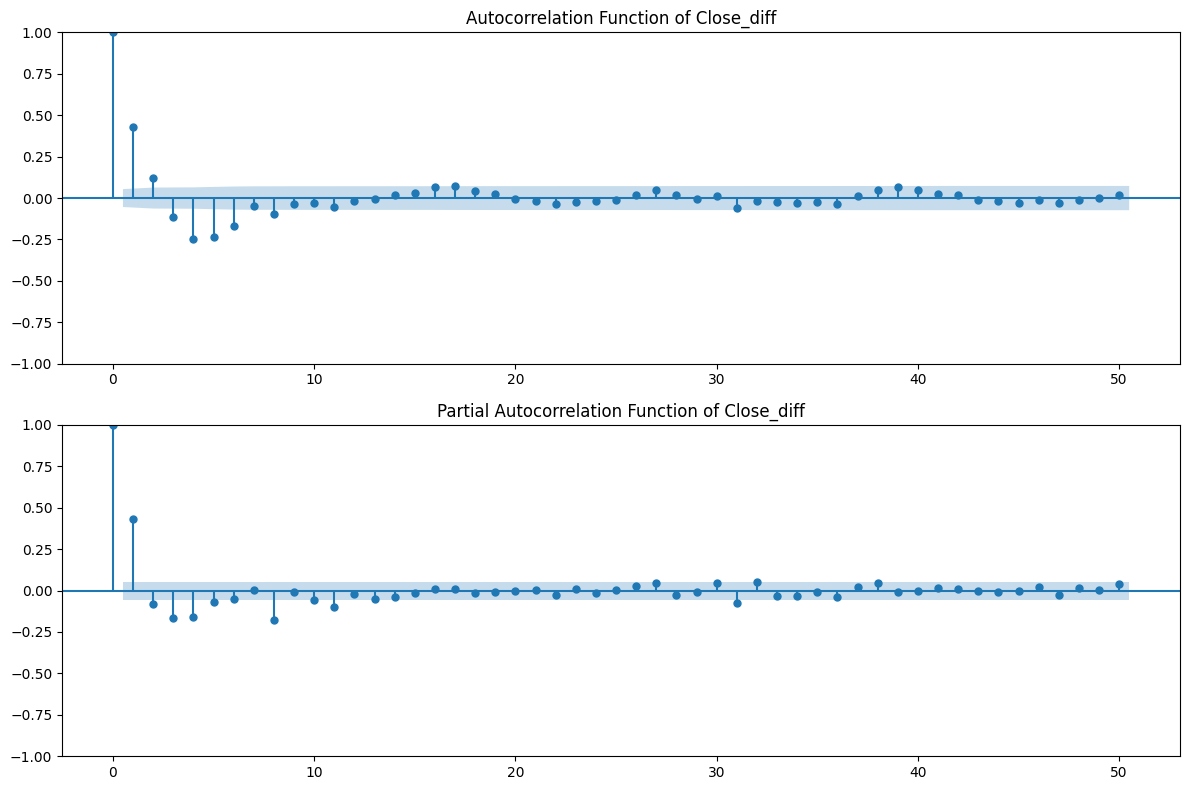

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df1['Close_diff'].dropna(), ax=ax1, lags=50)
ax1.set_title('Autocorrelation Function of Close_diff')

plot_pacf(df1['Close_diff'].dropna(), ax=ax2, lags=50)
ax2.set_title('Partial Autocorrelation Function of Close_diff')

plt.tight_layout()
plt.show()